<a href="https://colab.research.google.com/github/cgschenck/New2AI/blob/master/DeepLearningModels_Keras_blanks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Models with Keras

## Defining Sequential model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential() 
model.add(Dense(4, input_dim=2)) 
model.add(Activation("relu"))
model.add(Dense(1)) 
model.add(Activation("sigmoid"))
          
# print model
model.summary()

Using TensorFlow backend.





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


## Visualize model

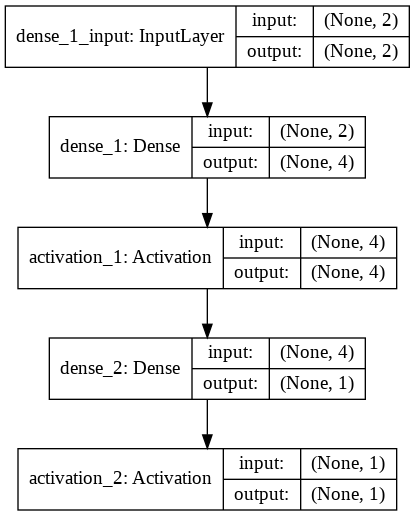

In [0]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Simple model

In [0]:
simple_model = Sequential() 
simple_model.add(Dense(4, input_dim=2, activation='relu')) 
simple_model.add(Dense(1, activation="sigmoid")) 
simple_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


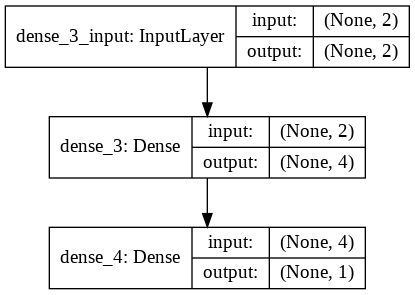

In [0]:
plot_model(simple_model, to_file='simple_model_plot.png', show_shapes=True, show_layer_names=True)

# Functional API


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


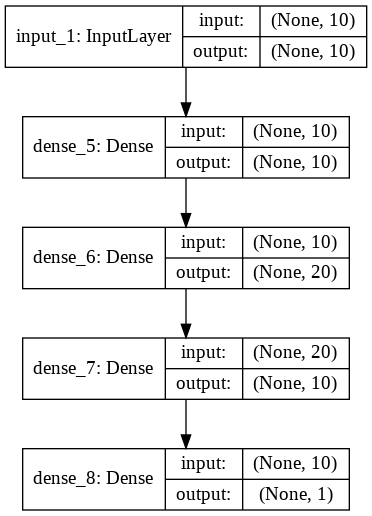

In [0]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

# define input
visible = Input(shape=(10,))

# connect layers
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)

# finally, we create the model
model = Model(inputs=visible, outputs=output)

# summarize layers
model.summary()

# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png',  show_shapes=True, show_layer_names=True)

# Model training

In [0]:
# build model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

# save model
model.save("model.h5")
print("Model trained and saved!")



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
1000/1000 [==============================] - 1s 685us/step - loss: 0.7197 - acc: 0.4970
Epoch 2/10
1000/1000 [==============================] - 0s 39us/step - loss: 0.7028 - acc: 0.5120
Epoch 3/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.6982 - acc: 0.5080
Epoch 4/10
1000/1000 [==============================] - 0s 38us/step - loss: 0.6915 - acc: 0.5350
Epoch 5/10
1000/1000 [==============================] - 0s 42us/step - loss: 0.6878 - acc: 0.5380
Epoch 6/10
1000/1000 [==============================] - 0s 35us/step - loss: 0.6806 - acc: 0.5510
Epoch 7/10
1000/1000 [==============================] - 0s 42us/step - loss: 0.6782 - acc: 0.5640
Epoch 8/10
1000/1000 [==============================] - 0s 42us/step - loss: 0.6724 - acc: 0.5800
Epoch 9/10
1000/1000 [==============================] - 0s 40us/step - loss: 0.6712 - acc: 0.5790
Epoch 10/10
1000/100

In [0]:
from keras.models import load_model

# load model
loaded_model = load_model("model.h5")

# predict
data_example = np.random.random((1, 100))
loaded_model.predict(data_example)


array([[0.5790953]], dtype=float32)

# Task: Custom model

Let's build this model using Sequential & Functional API
![alt text](https://miro.medium.com/max/1400/1*3fA77_mLNiJTSgZFhYnU0Q@2x.png)

In [0]:
# code for Sequential model

In [0]:
# code for Functional API

## Multi-class classification with Iris Dataset

In [0]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

# load the iris dataset
iris_data = load_iris()

print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

# convert output classes to dummy variables (i.e. one hot encoded)
# FILL BLANKS 

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

# Build the model
# FILL BLANKS 

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=100)

# Test on unseen data
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

In [0]:
# clone github repo to get datasets
!git clone https://github.com/BeirutAI/GDG-IntroDL.git

# move into repo directory
%cd GDG-IntroDL/

## Binary classification with Sonar dataset

In [0]:
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataframe = read_csv("data/sonar.csv", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# encode class values as integers
# FILL BLANKS 

# baseline model
# create model with 1 hidden layer of size 60 and 1 output layer.
# the layers should have a 'normal' initialization of weights
# compile the model with adam optimizer
# FILL BLANKS 

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(X, encoded_Y, test_size=0.20)

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=100)

# Test on unseen data
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


## Regression with Boston House Price dataset

In [0]:
# Regression Example With Boston Dataset
import numpy
import math
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv("data/housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

# define base model
# create Sequential model with 1 hidden layer (size = input layer size)
# create model
# FILL BLANKS 

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20)

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=100)

# Test on unseen data
results = model.evaluate(test_x, test_y)
print('Test Score: %.2f MSE ' % (results))


## Tune The Neural Network Topology
### 1. Evaluate a deeper network

In [0]:
# deeper network

### 2. Evaluate a wider network

In [0]:
# wider network